In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline 
import matplotlib.pyplot as plt   
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [160]:
vehicles = pd.read_csv('vehicle.csv').dropna()

In [161]:
vehicles.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [162]:
pd.value_counts(vehicles['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

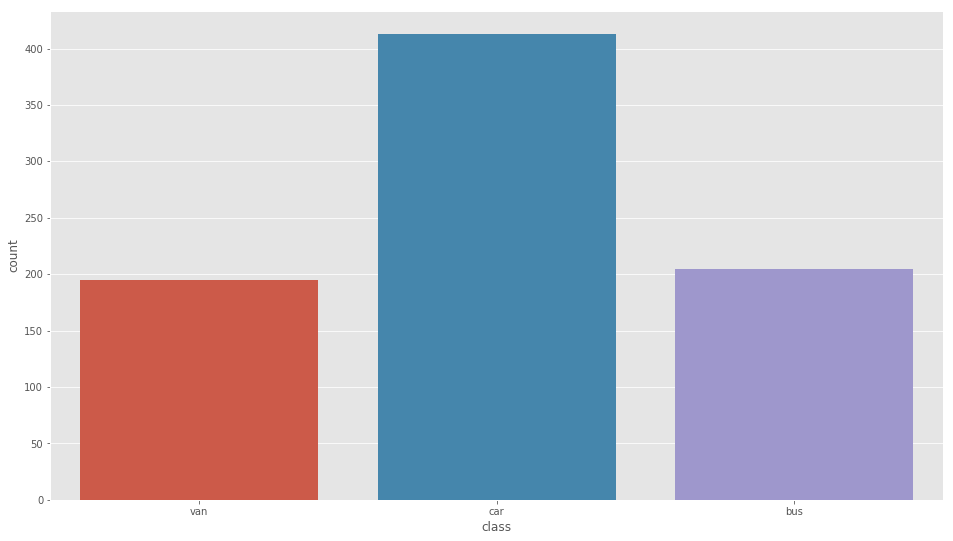

In [158]:
sns.countplot(vehicles['class'])

### Check for any missing values in the data 

In [163]:
vehicles.isna().sum().sum()

0

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [164]:
X = vehicles.drop(columns=['class'])

In [165]:
sc = StandardScaler()

In [166]:
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.shape

(813, 18)

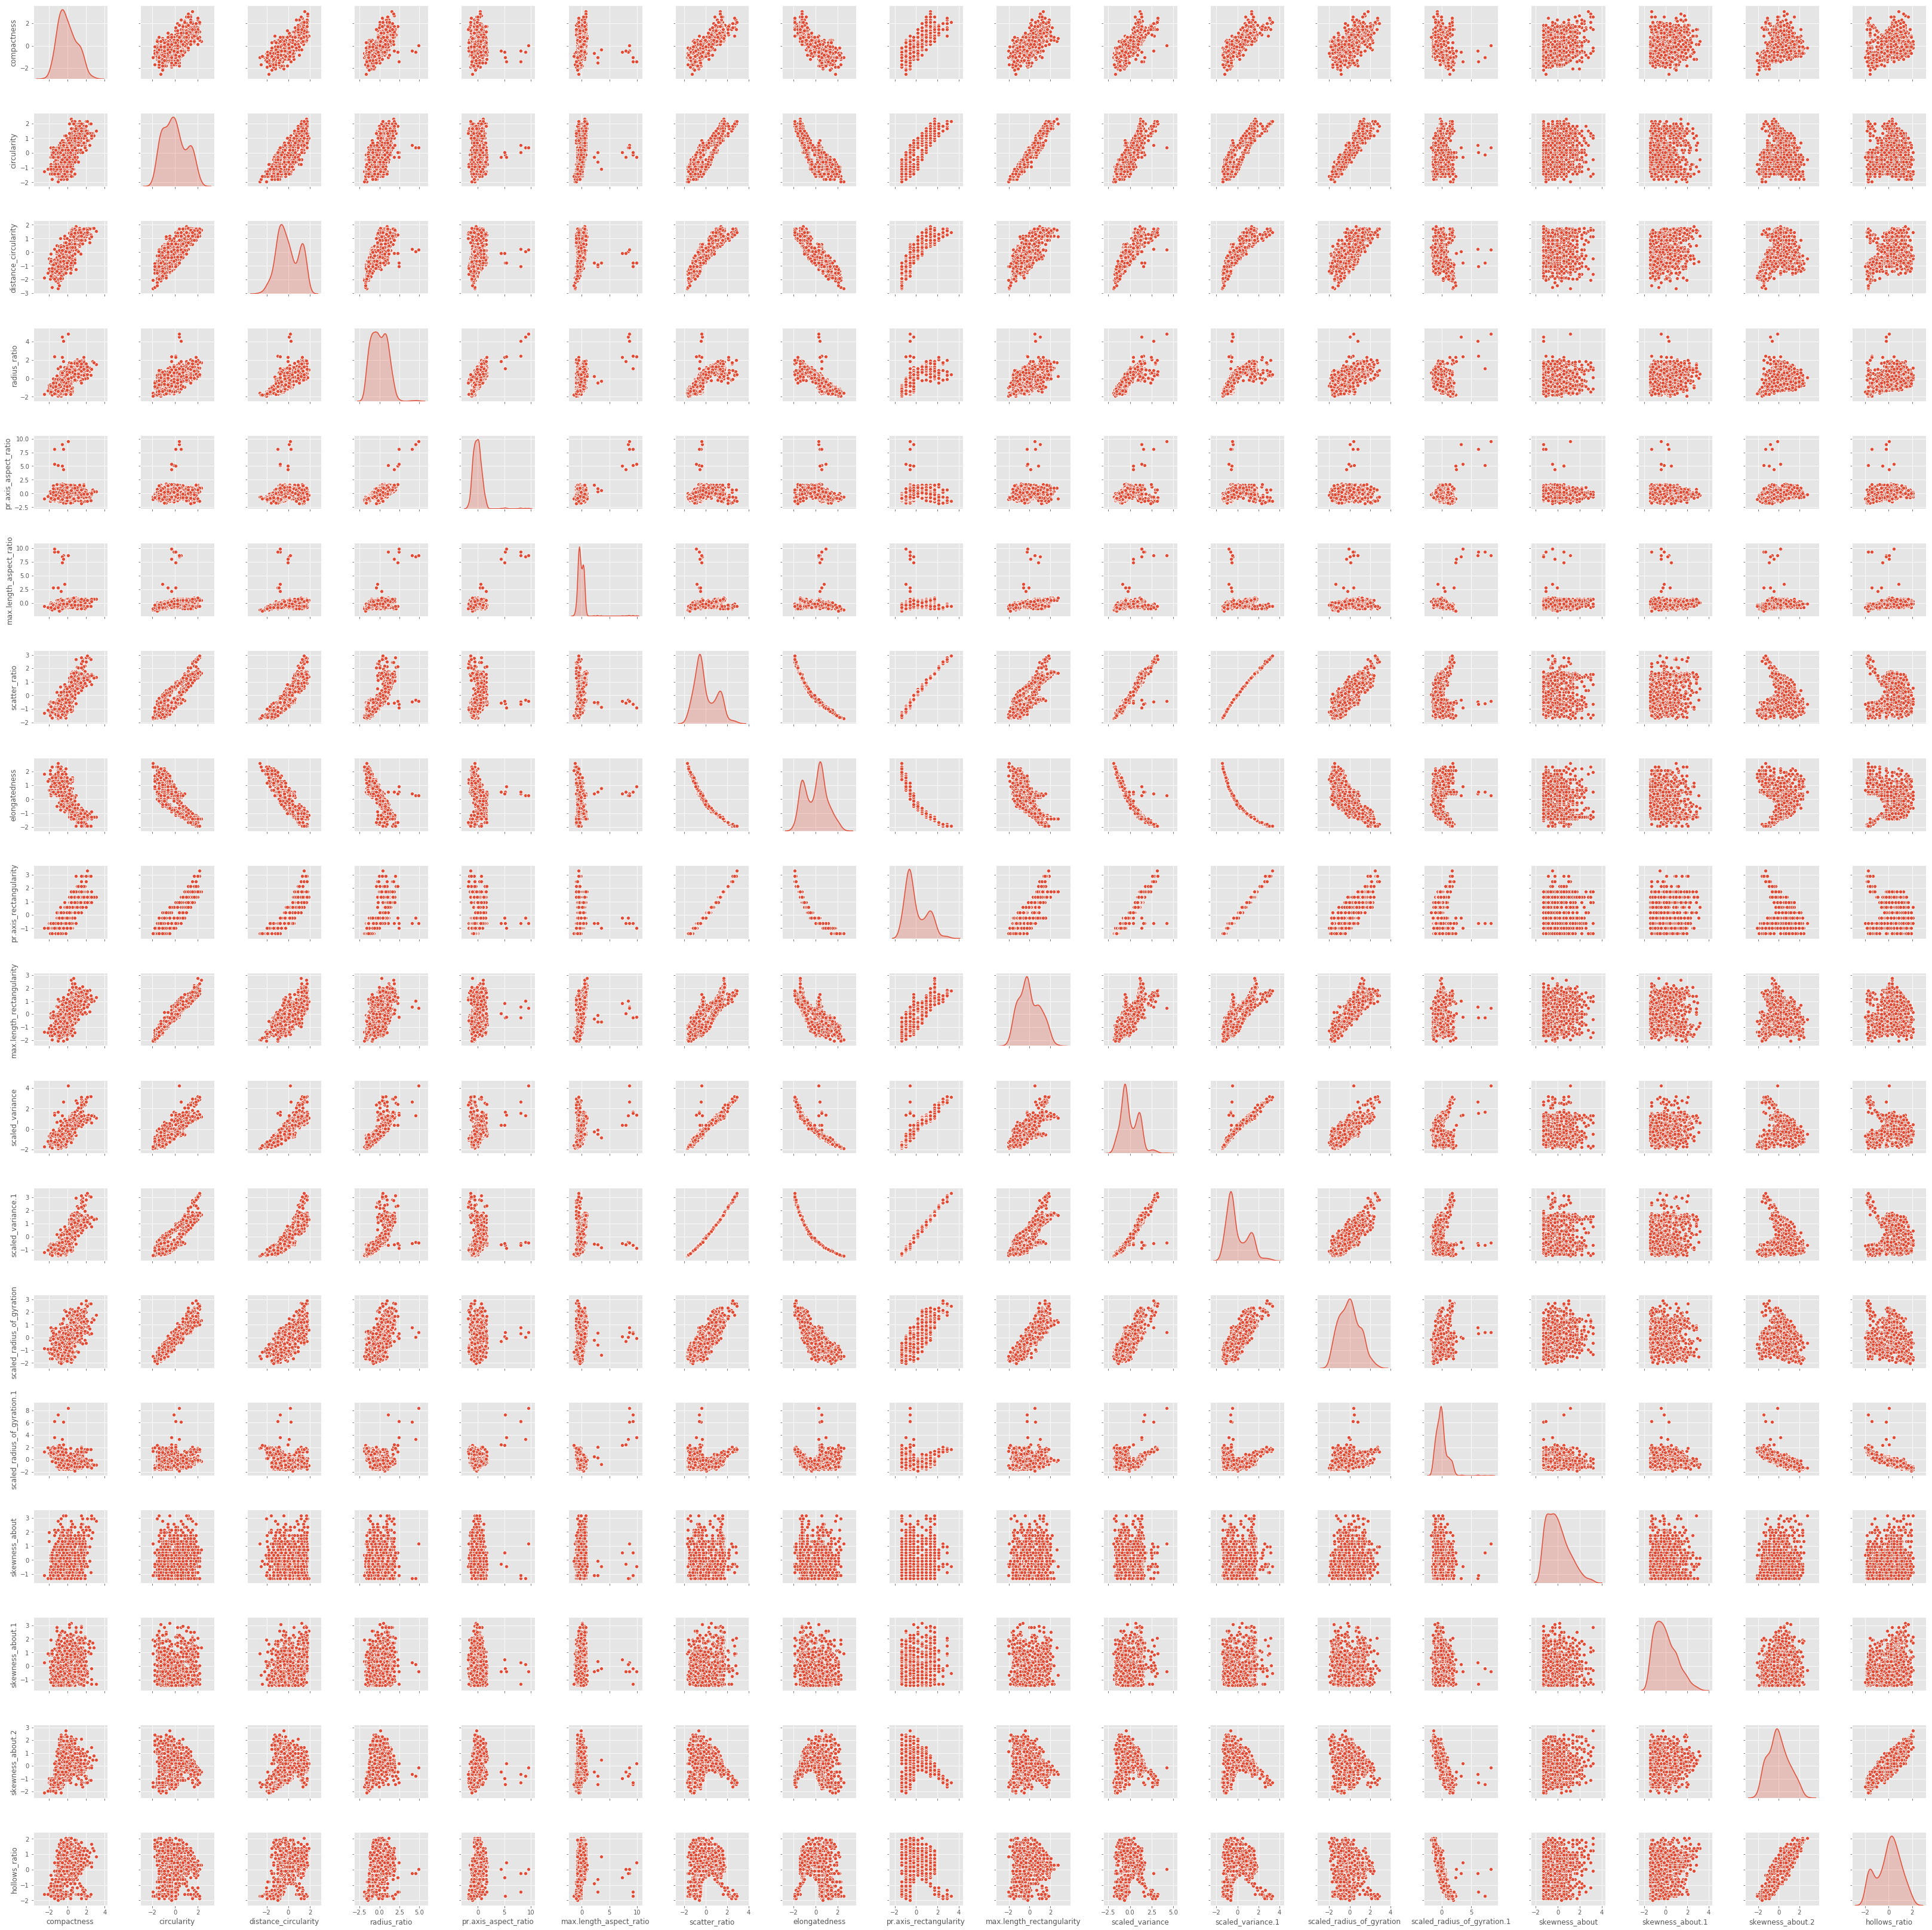

In [167]:
sns.pairplot(X_scaled,diag_kind='kde')

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [168]:
cluster_error = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [169]:
cluster_range = range(1, 10)
cluster_errors = []
for k in cluster_range:
  kmeans = KMeans(k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_                     # capture the cluster lables
  centroids = kmeans.cluster_centers_         # capture the centroids
  cluster_errors.append(kmeans.inertia_)    # capture the inertia

# Combining the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors": cluster_errors})
clusters_df.head()

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5740.480402
4,5,5186.753590


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

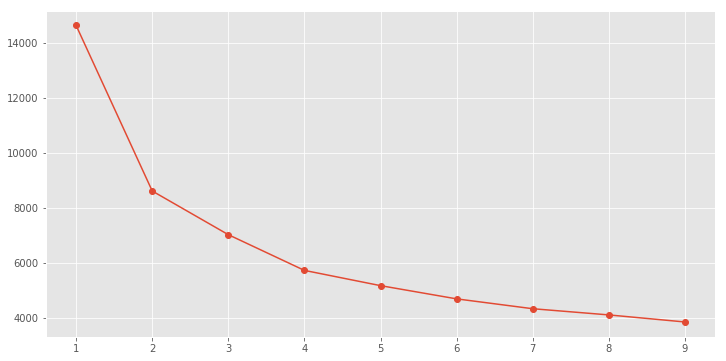

In [170]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

In [171]:
print('From the elbow plot, the optimal value of k is equal to 4')

From the elbow plot, the optimal value of k is equal to 4


### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [172]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X_scaled)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
print("Centroid values:\n", centroids)

Centroid values:
 [[-9.16832565e-01 -5.26197142e-01 -8.87660194e-01 -1.08730080e+00
  -5.63171965e-01 -3.01082567e-01 -7.80129512e-01  8.67496080e-01
  -7.46976617e-01 -4.90093382e-01 -8.01399405e-01 -7.84100480e-01
  -3.93621965e-01  7.79115435e-01 -9.18548921e-02 -2.83968154e-01
  -1.04336571e+00 -1.09942461e+00]
 [ 1.15442786e+00  1.18428647e+00  1.21198691e+00  9.73321772e-01
   9.49213388e-02  2.18659142e-01  1.29796844e+00 -1.21424667e+00
   1.30184458e+00  1.09830595e+00  1.20590258e+00  1.30898668e+00
   1.09121291e+00 -1.07878646e-01  1.68326262e-01  2.67954844e-01
   4.67043879e-03  1.90327006e-01]
 [-2.25338256e-01 -5.74342724e-01 -3.07614353e-01 -3.81865644e-02
   1.81774089e-01 -1.72461386e-01 -4.55562374e-01  3.20123317e-01
  -4.83943612e-01 -5.36605811e-01 -4.20567716e-01 -4.60232777e-01
  -6.03827964e-01 -6.44323227e-01 -6.09955778e-02  4.54841126e-03
   8.24841721e-01  7.07985111e-01]
 [-7.33024343e-01  7.27349604e-02 -2.72170954e-01  2.94768327e+00
   6.83665190e+00  

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [173]:
centroids_df = pd.DataFrame(centroids,columns=X_scaled.columns)
centroids_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.916833,-0.526197,-0.887660,-1.087301,-0.563172,-0.301083,-0.780130,0.867496,-0.746977,-0.490093,-0.801399,-0.784100,-0.393622,0.779115,-0.091855,-0.283968,-1.043366,-1.099425
1,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
2,-0.225338,-0.574343,-0.307614,-0.038187,0.181774,-0.172461,-0.455562,0.320123,-0.483944,-0.536606,-0.420568,-0.460233,-0.603828,-0.644323,-0.060996,0.004548,0.824842,0.707985
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [174]:
print(kmeans.labels_)

[2 2 1 2 3 2 2 2 2 2 2 2 2 1 0 2 1 0 0 2 2 1 2 0 1 1 0 2 2 2 1 2 0 3 1 0 1
 0 0 2 1 0 0 0 0 2 0 2 1 2 1 2 2 0 1 0 1 0 0 0 2 0 1 2 1 1 2 0 2 1 2 0 0 1
 2 0 2 1 2 0 2 0 1 2 1 2 0 1 0 0 1 0 3 2 2 0 1 1 0 0 1 2 2 0 0 0 2 1 1 2 0
 0 2 0 0 0 0 0 2 1 1 2 2 0 1 3 0 2 0 2 2 1 0 2 1 2 2 2 2 1 2 2 1 2 1 2 0 2
 0 1 2 2 1 1 2 1 0 0 1 1 2 1 2 2 2 2 0 1 0 2 0 1 2 2 2 1 2 1 2 1 2 0 1 0 0
 0 2 2 1 1 2 2 2 0 1 2 2 2 1 0 0 1 0 2 1 0 0 0 2 1 2 1 0 0 0 0 1 2 0 2 1 0
 2 2 0 1 0 0 2 2 1 0 1 0 2 2 1 2 2 1 1 0 2 2 2 1 0 2 2 0 0 2 2 1 2 0 0 1 2
 2 0 0 1 0 2 1 0 2 3 2 2 1 2 1 0 2 2 1 2 2 2 0 2 1 1 1 1 0 2 1 0 0 0 2 0 1
 1 0 1 2 0 1 0 2 2 1 1 0 1 1 0 1 2 2 2 0 0 1 1 1 2 2 2 1 0 2 0 1 2 2 1 2 1
 1 1 2 0 0 1 0 0 0 2 2 2 2 0 1 1 0 0 1 0 1 0 1 2 0 2 0 3 1 0 2 2 2 1 2 2 2
 2 1 2 1 2 1 2 0 0 2 2 2 0 0 2 0 1 2 2 0 0 1 2 0 2 2 1 2 1 2 1 1 0 0 1 2 0
 0 2 1 1 0 2 1 1 0 1 1 1 2 2 2 2 2 1 0 0 2 1 2 2 1 2 0 1 0 0 1 2 0 1 1 1 0
 1 1 0 2 0 1 1 2 2 0 0 1 2 0 1 1 2 0 1 1 2 0 0 1 1 1 0 0 1 1 1 2 2 1 0 2 1
 2 0 0 2 1 0 2 2 0 3 1 2 

In [175]:
X_scaled['labels'] = kmeans.labels_

In [176]:
pd.value_counts(X_scaled['labels'])

2    309
1    256
0    240
3      8
Name: labels, dtype: int64

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [177]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [178]:
data_a = pd.DataFrame(a)
data_b = pd.DataFrame(b)
data_c = pd.DataFrame(c)
data = data_a.append(data_b)
data = pd.concat([data_a,data_b,data_c], ignore_index=True)

### 10. Use scatter matrix to print all the 3 distributions

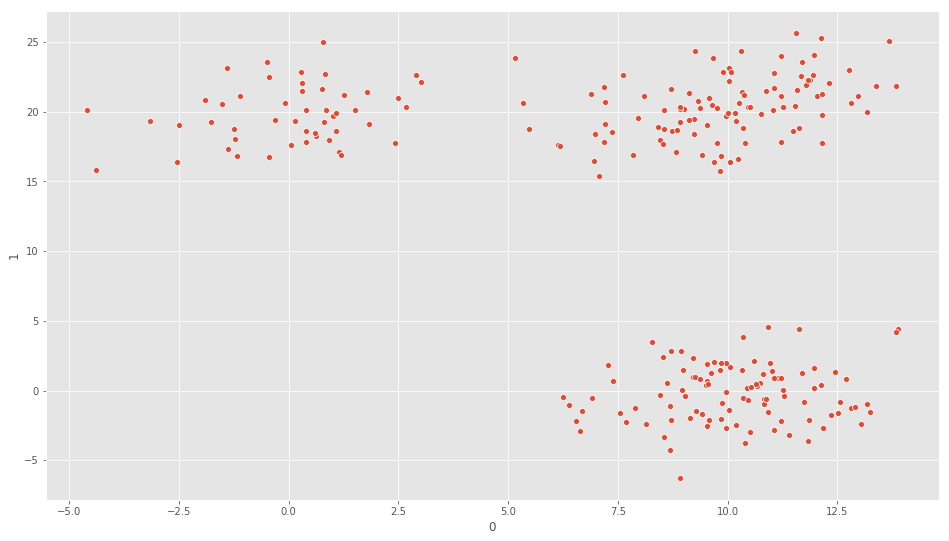

In [179]:
sns.scatterplot(data[0],data[1])

In [180]:
sc = StandardScaler()
data_scaled = pd.DataFrame(sc.fit_transform(data))
data_scaled.shape

(250, 2)

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [181]:
Z = linkage(data_scaled, method='ward',metric='euclidean')
c, coph_dists = cophenet(Z , pdist(data_scaled))
print("Ward",c)

Ward 0.864721309636431


### 12. Plot the dendrogram for the consolidated dataframe

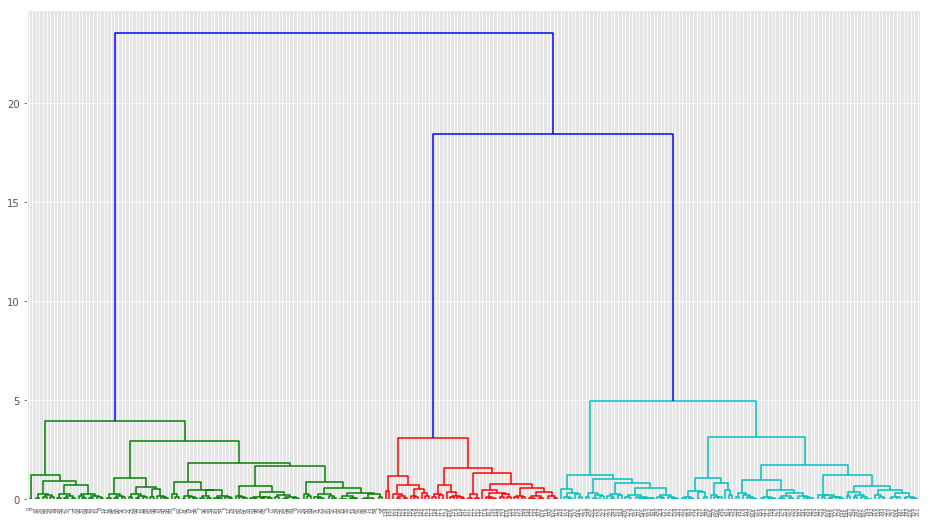

In [182]:
dend = dendrogram(Z)

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

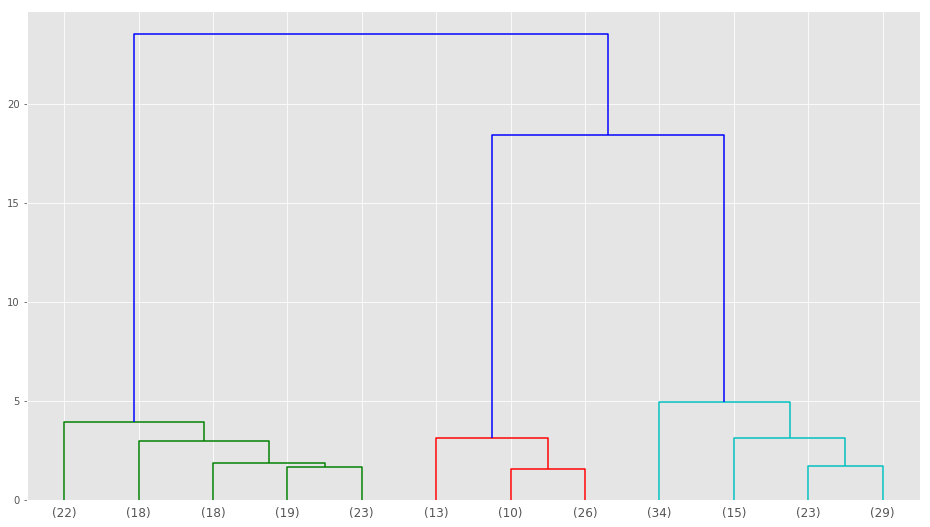

In [183]:
dend = dendrogram(Z, truncate_mode='lastp', p=12)

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [184]:
print("From the dendrogram, the optimal distance that we are using to from 3 clusters is 10")
optimal_distance = 10
sch.distance.pdist(Z).max()

From the dendrogram, the optimal distance that we are using to from 3 clusters is 10


738.3940576430256

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [185]:
data_scaled['labels'] = fcluster(Z,optimal_distance,criterion='distance')
data_scaled.groupby(["labels"]).count()

,0,1
labels,,
1,100,100
2,49,49
3,101,101


### Use matplotlib to visually observe the clusters in 2D space 

In [150]:
#cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
#cluster.fit_predict(data_scaled)
#data_scaled['labels'] = cluster.labels_
#data_scaled.groupby(["labels"]).count()

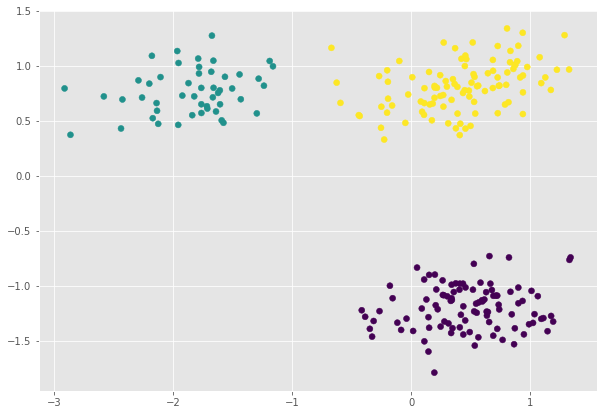

In [186]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled[0], data_scaled[1], c=data_scaled['labels']) 